In [1]:
import pandas as pd
import os
import networkx as nx
import itertools
from netwulf import visualize
import netwulf as nw
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib

In [2]:
author_df = pd.read_csv("C:\\Users\\mansj\\IQL\\data\\databank_deposit_version_2\\exrx_author_final.csv")
article_list = pd.read_csv(r"C:\Users\mansj\IQL\Article_list.csv")

In [3]:
author_df.head()

,ID,Title,author_given_name,author_surname,author_id
0,1,Physical activity in depressed elderly. a syst...,Gioia,Mura,7005321937
1,1,Physical activity in depressed elderly. a syst...,Mauro Giovanni,Carta,7006714673
2,2,Exercise for depression,Gary. M.,Cooney,26028761700
3,2,Exercise for depression,Kerry,Dwan,25027473800
4,2,Exercise for depression,Carolyn A.,Greig,7003441733


In [4]:
article_list.head()

,Our ID,Our Item Type,Item Type,Publication Year,Author,Title,Publication Title,ISSN,DOI,URL,...,Pages,Num Pages,Issue,Volume,Publisher,Place,Language,Type,Our Sorting Date,Our Note
0,1,ReviewArticle,journalArticle,2013,"Mura, Gioia;Carta, Mauro Giovanni",Physical activity in depressed elderly. a syst...,Clinical Practice & Epidemiology in Mental Health,1745-0179,10.2174/1745017901309010125,https://clinical-practice-and-epidemiology-in-...,...,125-135,NaN,1,9,NaN,NaN,en,NaN,7/12/2013,NaN
1,2,ReviewArticle,journalArticle,2013,"Cooney, Gary M;Dwan, Kerry;Greig, Carolyn A;La...",Exercise for depression,Cochrane Database of Systematic Reviews,14651858,10.1002/14651858.CD004366.pub6,http://doi.wiley.com/10.1002/14651858.CD004366...,...,CD004366,NaN,9,2013,NaN,NaN,en,NaN,9/12/2013,NaN
2,3,ReviewArticle,journalArticle,2013,"Mammen, George;Faulkner, Guy",Physical activity and the prevention of depres...,American Journal of Preventive Medicine,7493797,10.1016/j.amepre.2013.08.001,https://linkinghub.elsevier.com/retrieve/pii/S...,...,649-657,NaN,5,45,NaN,NaN,en,NaN,11/1/2013,NaN
3,4,ReviewArticle,journalArticle,2013,"Cramer, Holger;Lauche, Romy;Langhorst, Jost;Do...",Yoga for depression: a systematic review and m...,Depression and Anxiety,10914269,10.1002/da.22166,http://doi.wiley.com/10.1002/da.22166,...,1068-1083,NaN,11,30,NaN,NaN,en,NaN,11/1/2013,NaN
4,5,ReviewArticle,journalArticle,2014,"Josefsson, T.;Lindwall, M.;Archer, T.",Physical exercise intervention in depressive d...,Scandinavian Journal of Medicine & Science in ...,9057188,10.1111/sms.12050,http://doi.wiley.com/10.1111/sms.12050,...,259-272,NaN,2,24,NaN,NaN,en,NaN,4/1/2014,NaN


In [5]:
author_df["full_name"] = author_df['author_given_name'] + " " + author_df['author_surname'].fillna('')
author_df.head()
com_df = pd.DataFrame(author_df.groupby('ID')['full_name'].apply(list))
com_df.head()

,full_name
ID,
1,"[Gioia Mura, Mauro Giovanni Carta]"
2,"[Gary. M. Cooney, Kerry Dwan, Carolyn A. Greig..."
3,"[George Mammen, Guy Faulkner]"
4,"[Holger Cramer, Romy Lauche, Jost Langhorst, G..."
5,"[T. Josefsson, M. Lindwall, T. Archer]"


In [6]:
list_authors  = pd.DataFrame(author_df.groupby('author_id')['full_name'].apply(list))
auth_list = list_authors.full_name.to_list()

auth_dict = dict()

for i in auth_list:
    i = list(set(i))
    if len(i) > 1:
        auth_dict[i[0]] = i[1:]

#### Function replaces the names of author with same id with the selected key in the dictionary
def replace(auth_name, final_dict):
    for k, v in final_dict.items():
        if auth_name in v:
            auth_name = k
            
    return auth_name
    

author_df.full_name = author_df.full_name.apply(lambda x : replace (x, auth_dict))

In [7]:
author_df[author_df.author_id == 7103153350]

,ID,Title,author_given_name,author_surname,author_id,full_name
393,88,Exercise and depression: meeting standards to ...,M.,Trivedi,7103153350,M. H. Trivedi
430,95,The DOSE study: a clinical trial to examine ef...,Madhukar H.,Trivedi,7103153350,M. H. Trivedi
485,106,Exercise treatment for depression: Efficacy an...,Madhukar H.,Trivedi,7103153350,M. H. Trivedi
1088,219,Exercise as an augmentation treatment for nonr...,Madhukar H.,Trivedi,7103153350,M. H. Trivedi
1168,232,Effects of serum brain derived neurotrophic fa...,Madhukar H.,Trivedi,7103153350,M. H. Trivedi
1559,291,Pro-inflammatory cytokines as predictors of an...,M. H.,Trivedi,7103153350,M. H. Trivedi
2501,108,The effect of exercise dose on quality of life...,MH,Trivedi,7103153350,M. H. Trivedi


In [8]:
merged_type_df = pd.merge(com_df, article_list, how = "inner", left_on="ID", right_on="Our ID")
merged_type_df = merged_type_df[["Our ID", "full_name","Our Item Type", "Title"]]
merged_type_df.rename(columns={"Our ID":"ID", "Our Item Type":"item_type", "Title" :"title"}, inplace=True)

new  = []
for i in range(1,len(merged_type_df["ID"])):
    name = merged_type_df["full_name"].loc[i]
    type_t = merged_type_df["item_type"].loc[i]
    if len(name) >= 2:
        for subset in itertools.combinations(name,2):
            if len(subset) == 2:
                new.append({"auth":subset, "type":type_t})
                
df = pd.DataFrame(new)
df.head()

,auth,type
0,"(Gary. M. Cooney, Kerry Dwan)",ReviewArticle
1,"(Gary. M. Cooney, Carolyn A. Greig)",ReviewArticle
2,"(Gary. M. Cooney, Debbie. A. Lawlor)",ReviewArticle
3,"(Gary. M. Cooney, Janet B. Rimer)",ReviewArticle
4,"(Gary. M. Cooney, Fiona R. Waugh)",ReviewArticle


In [9]:
new  = {}
r_count = 0
i_count = 0
for i in range(1,len(merged_type_df)):
    name = merged_type_df["full_name"].loc[i]
    type_t = merged_type_df["item_type"].loc[i]
    if type_t == "ReviewArticle":
        r_count = 1
    else:
        i_count = 1
    if len(name) >= 2:
        for subset in itertools.combinations(name,2):
            if len(subset) == 2:
                
                subset = tuple(sorted(subset))
                
                if subset not in new.keys():
                    new[subset] = (r_count, i_count)
                else:
                    new[subset] = (new[subset][0] + r_count, new[subset][1] + i_count)
                    
#                 new.append({"auth":subset, "type":type_t})

In [18]:
df = pd.DataFrame(new.items(), columns=['authors','counts'])
df[['reviews', 'included']] = pd.DataFrame(df['counts'].tolist(), index=df.index)
df[['auth_1', "auth_2"]] = pd.DataFrame(df['authors'].tolist(), index = df.index)
df['total'] = df['reviews'] + df['included']
df['review_percent'] = round(df['reviews']/df['total'] ,3)

In [19]:
G = nx.from_pandas_edgelist(df, "auth_1", "auth_2", edge_attr='review_percent', create_using=nx.Graph())
giant = max(nx.connected_components(G), key=len)

giant_list = list(giant)

N = nx.Graph()

for node in G.nodes():
    if node in giant_list:
        for k, v in G.edges(node):
            N.add_edge(k,v, weight = G[k][v]["review_percent"])

In [146]:
# label_nodes = []

# for e in G.edges():
#     if G.get_edge_data(e[0],e[1])['review_percent'] >= 9:
#         label_nodes.append(e[0])
#         label_nodes.append(e[1])

# label_nodes = list(set(label_nodes))
# label_nodes

# labels = {}

# for node in G.nodes():
#     if node in label_nodes:
#         labels[node] = node.split(" ")[-1]

# edges,weights = zip(*nx.get_edge_attributes(N,'weight').items())

# pos = nx.spring_layout(G, k = 0.56, scale = 50)
# nodes = nx.draw_networkx_nodes(N, pos=pos, node_color="black", node_size=10)
# edges_1 = nx.draw_networkx_edges(N,pos=pos, node_size = 10, edgelist=edges, edge_color=weights,  edge_cmap=plt.cm.Wistia)
# nx.draw_networkx_labels(N,pos,labels,font_size=10,font_color='black')
# plt.Figure(figsize=(15,18))

# plt.sci(edges_1)
# plt.colorbar()

# plt.rcParams["figure.figsize"] = [12, 8]
# plt.rcParams["figure.autolayout"] = True

# plt.savefig("graph.pdf", dpi = 800)


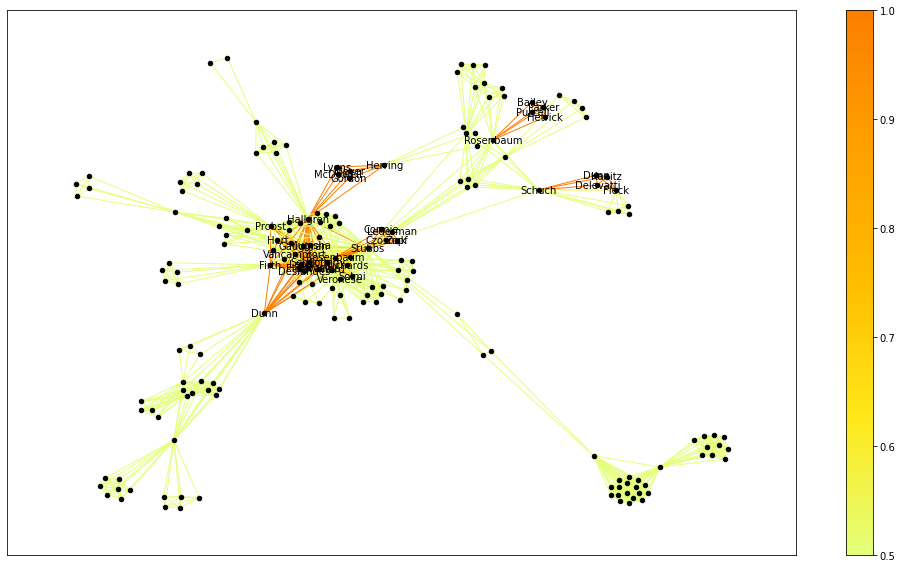

In [145]:
label_nodes = []

for e in N.edges():
    if N.get_edge_data(e[0],e[1])['weight'] >= 0.9:
        label_nodes.append(e[0])
        label_nodes.append(e[1])

label_nodes = list(set(label_nodes))
label_nodes

labels = {}

for node in N.nodes():
    if node in label_nodes:
        labels[node] = node.split(" ")[-1]

edges,weights = zip(*nx.get_edge_attributes(N,'weight').items())

pos = nx.spring_layout(N, k  =0.10,scale = 100)
nodes = nx.draw_networkx_nodes(N, pos=pos,node_size = 20, node_color="black")
edges_1 = nx.draw_networkx_edges(N,pos=pos, edgelist=edges, edge_color=weights,  edge_cmap=plt.cm.Wistia)
nx.draw_networkx_labels(N, pos,labels,font_size=10,font_color='black')

# plt.Figure(figsize=(15,18))

plt.sci(edges_1)
plt.colorbar()

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = False

plt.savefig("graph_scale.pdf", dpi = 800)


In [74]:
#### node review article

new_auth  = {}
r_count = 0
i_count = 0
for i in range(1,len(merged_type_df)):
    name = merged_type_df["full_name"].loc[i]
    type_t = merged_type_df["item_type"].loc[i]
    if type_t == "ReviewArticle":
        r_count = 1
    else:
        i_count = 1
    if len(name) >= 2:
        for subset in itertools.combinations(name,2):
            if len(subset) == 2:
                
                subset = tuple(sorted(subset))
                for i in subset:
                    if i not in new_auth.keys():
                        new_auth[i] = (r_count, i_count)
                    else:
                        new_auth[i] = (new_auth[i][0] + r_count, new_auth[i][1] + i_count)
                    

df = pd.DataFrame(new_auth.items(), columns=['authors','counts'])
df[['reviews', 'study']] = pd.DataFrame(df['counts'].tolist(), index=df.index)
df['total'] = df['reviews'] + df['study']
df['review'] = round(df['reviews']/df['total'],2)

df_attr = df[['authors','review']]
node_attr = df_attr.set_index('authors').to_dict('index')
nx.set_node_attributes(N, node_attr, name = "review_percent")

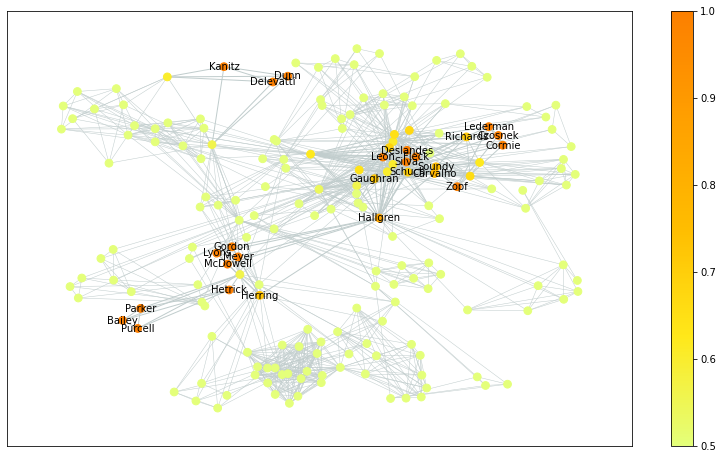

In [131]:
label_nodes = []

for n in N.nodes():
    if N.nodes[n]["review_percent"]['review'] >= 0.7:
        label_nodes.append(n)

label_nodes = list(set(label_nodes))
label_nodes

labels = {}

for node in N.nodes():
    if node in label_nodes:
        labels[node] = node.split(" ")[-1]

edges,weights = zip(*nx.get_edge_attributes(N,'weight').items())
nodes, r_pct = zip(*nx.get_node_attributes(N,'review_percent').items())

node_weight = []
for r in r_pct:
    node_weight.append(r['review'])

pos = nx.spring_layout(N, k=0.35, scale = 500)
nodes = nx.draw_networkx_nodes(N, pos=pos, nodelist=nodes, node_size=60, node_color=node_weight, cmap = plt.cm.Wistia)
edges_1 = nx.draw_networkx_edges(N,pos=pos, node_size = 10, width=weights, edgelist=edges, edge_color = '#C1CDCD')
nx.draw_networkx_labels(N, pos,labels,font_size=10,font_color='black')

# plt.Figure(figsize=(15,18))

plt.sci(nodes)
plt.colorbar()

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = False

plt.savefig("graph_scale.pdf", dpi = 800)
